In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

In [ ]:
X , y = make_blobs(n_features=2,centers=2,random_state=0)
y = y.reshape((y.shape[0],1))

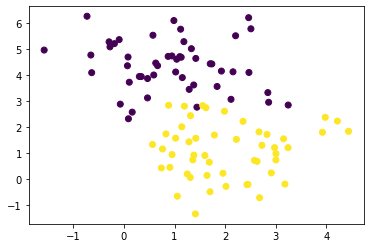

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [ ]:
def initialize(X):
    W = np.random.randn(X.shape[1],1)
    b = np.random.randn(1)
    return W,b

In [ ]:
W,b = initialize(X)

In [ ]:
def Model(X,W,b):
    Z = X.dot(W) + b
    A = 1 /( 1+np.exp(-Z) )
    return A

In [ ]:
A = Model(X,W,b)

In [ ]:
def log_loss(A, y):
    return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

In [ ]:
print(log_loss(A,y))

2.231611373929575


In [ ]:
def Gradient(A,X,y):
    Dw = ( 1 / len(y) )* np.dot( X.T , (A-y) )
    Db = ( 1 / len(y) ) * np.sum( A-y )
    return Dw,Db

In [ ]:
Dw,Db = Gradient(A,X,y)

In [ ]:
def Update(W,b,Dw,Db,learning_rate):
    W = W - learning_rate*Dw
    b =  b - learning_rate * Db
    return W,b

def predict(X, W, b):
    A = Model(X, W, b)
    # print(A)
    return A >= 0.5   

In [ ]:
def artificial_neuron(X,y,learning_rate=0.1,num_iter=100):
    W,b = initialize(X)
    Loss = []
    for i in range(num_iter):
         A = Model(X,W,b)
         Loss.append(log_loss(A,y))
         Dw,Db = Gradient(A,X,y)
         W,b=Update(W,b,Dw,Db,learning_rate)  
    #y_pred = predict(X,W,b)
    #print(accuracy_score(y,y_pred))
    plt.plot(Loss)
    plt.show()
    x0 = np.linspace(-1,4,100)
    x1 =  (-W[0]*x0 - b)/W[1]
    plt.scatter(X[:,0],X[:,1], c=y)
    plt.plot(x0,x1,c='orange',lw=3)
    plt.show()

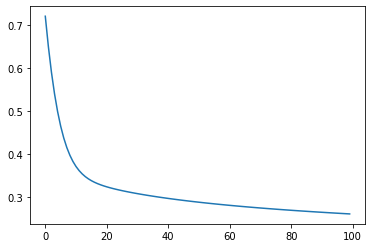

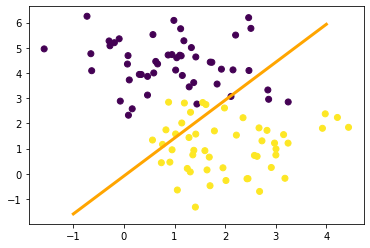

In [ ]:
artificial_neuron(X,y)

In [ ]:
import h5py
import numpy as np


def load_data():
    train_dataset = h5py.File('https://raw.githubusercontent.com/MachineLearnia/Deep-Learning-Youtube/main/datasets/testset.hdf5', "r")
    X_train = np.array(train_dataset["X_train"][:])
    y_train = np.array(train_dataset["Y_train"][:]) 
    test_dataset = h5py.File('https://raw.githubusercontent.com/MachineLearnia/Deep-Learning-Youtube/main/datasets/testset.hdf5', "r")
    X_test = np.array(test_dataset["X_test"][:]) 
    y_test = np.array(test_dataset["Y_test"][:]) 
    return X_train, y_train, X_test, y_test

In [ ]:
load_data()

OSError: ignored